Морфологический анализ <br/>
Домашнее задание 1 <br/>
**Голев Александр 135М**


# Получить изображения
- преобразованием изображения в полутоновое и последующей эквализацией;
- поканальной эквализацией (всех каналов и только одного из них);
- поканальной эквализацией и последующим преобразованием изображения в полутоновое; <br/>
и объяснить их различия друг с другом и с исходным, если в качестве
исходных изображений использованы изображения на рис. при использовании цветовой модели <br/>
**III. HSV**

Исходное изображение

<img src=".\image-001.jpg" alt="image-001" style="zoom:50%;" />

In [1]:
import cv2
from IPython.display import Image, display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Загружаем изображение
image_name = 'image-001.jpg'
image = cv2.imread(image_name)

# Преобразуйте изображение в цветовое пространство HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

## 1) Полутоновое изображение

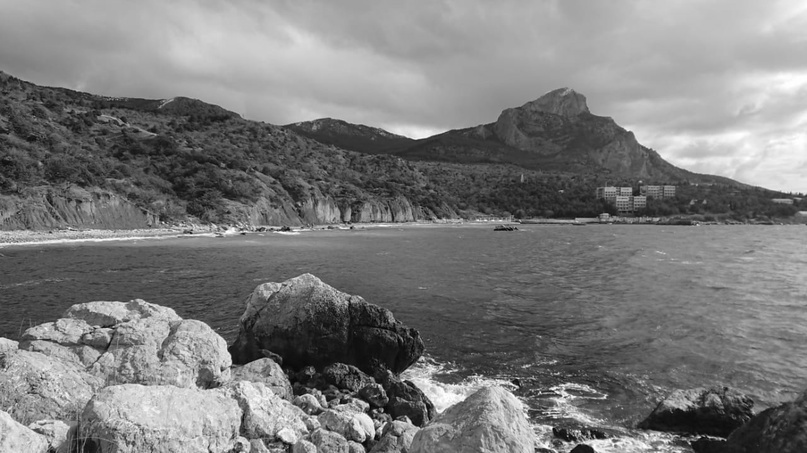

In [33]:
# Преобразование изображения в полутоновое
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Сохраним полутоновое изображение
cv2.imwrite(image_name.replace('.','_gray.'),gray_image)

# Отобразим полутоновое изображение (по желанию)
#cv2.imshow('Полутоновое изображение', gray_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
display(Image(filename=image_name.replace('.','_gray.'), width=400))

In [11]:
gray_image = gray_image.astype(np.uint16)

### Гистограмма изображения

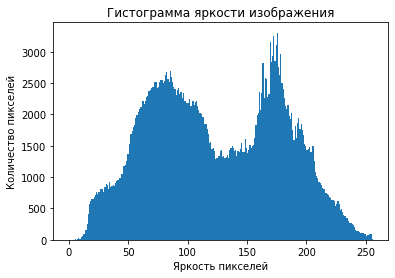

In [130]:
# Вычислим гистограмму
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

# Отображение гистограммы
plt.hist(gray_image.ravel(), 256, [0, 256])
plt.xlabel('Яркость пикселей')
plt.ylabel('Количество пикселей')
plt.title('Гистограмма яркости изображения')
plt.show()

### Эквализация

In [14]:
# Выполням эквализацию гистограммы
equalized_image_gray = cv2.equalizeHist(gray_image)

hist_equalized_gray = cv2.calcHist([equalized_image_gray], [0], None, [256], [0, 256])

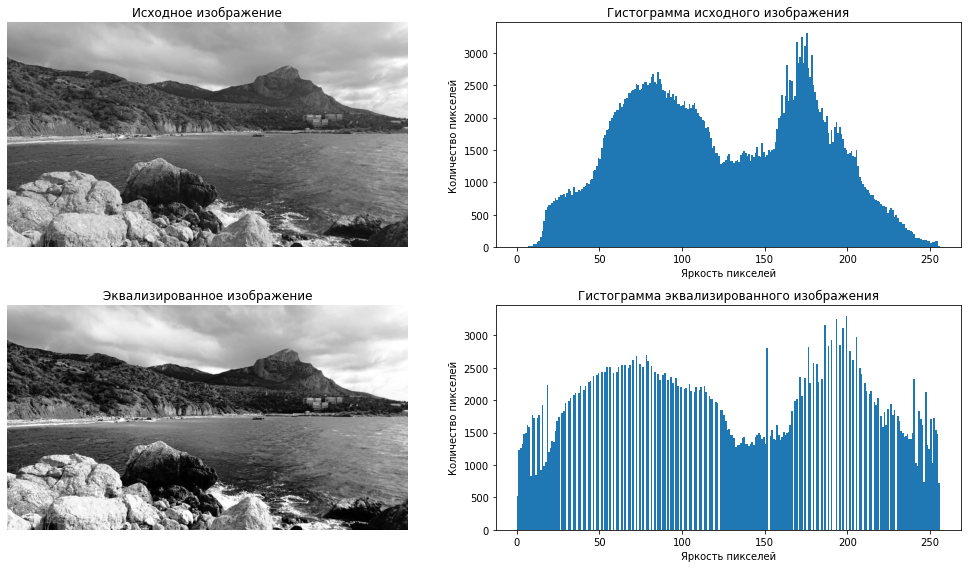

In [15]:
# Отображение исходного и эквализированного изображений
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(gray_image.ravel(), 256, [0, 256])
plt.title('Гистограмма исходного изображения')
plt.xlabel('Яркость пикселей')
plt.ylabel('Количество пикселей')

plt.subplot(2, 2, 3)
plt.imshow(equalized_image_gray, cmap='gray')
plt.title('Эквализированное изображение')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(equalized_image_gray.ravel(), 256, [0, 256])
plt.title('Гистограмма эквализированного изображения')
plt.xlabel('Яркость пикселей')
plt.ylabel('Количество пикселей')

plt.tight_layout()
plt.show()

In [18]:
gray_image.mean()

123.88930741224003

In [19]:
np.var(gray_image)

3052.2918905321912

In [20]:
np.var(equalized_image_gray)

5419.89774750436

In [17]:
equalized_image_gray.mean()

128.21565441460072

## 2) Поканальная эквализация (всех каналов и только одного из них)

In [21]:
def plotImage(image,  title, number,cmap = 'brg', size=[2, 3]):
    plt.subplot(size[0], size[1], number)
    plt.imshow(image, cmap = cmap)
    plt.title(title)
    plt.axis('off')

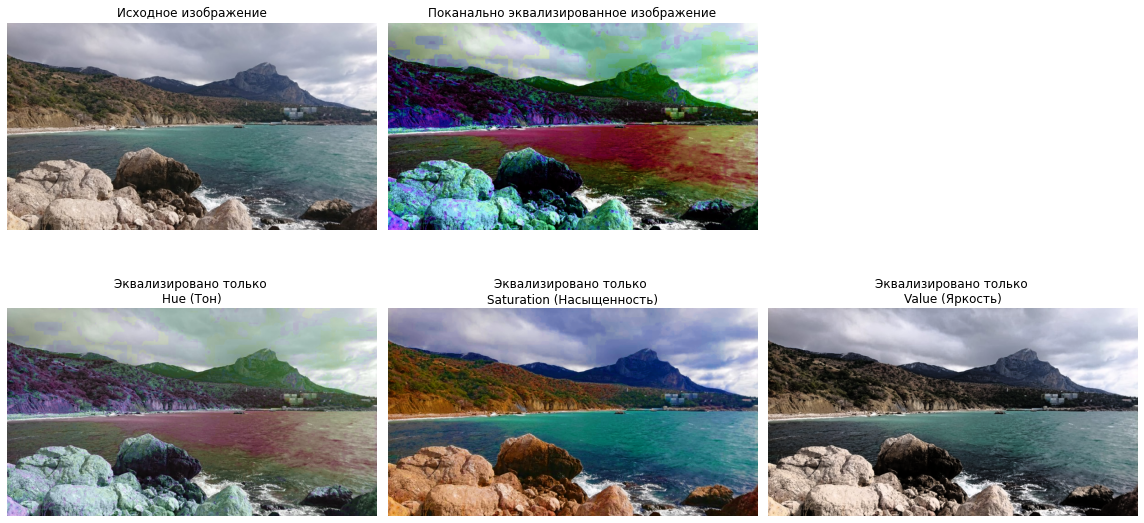

In [22]:
h, s, v = cv2.split(hsv_image)

# Выполням эквализацию гистограммы для каждого канала
h_equalized = cv2.equalizeHist(h)
s_equalized = cv2.equalizeHist(s)
v_equalized = cv2.equalizeHist(v)

# Объединям эквализированные каналы обратно в цветное изображение
equalized_image = cv2.merge([h_equalized,  s_equalized, v_equalized])
h_equalized_image = cv2.merge([h_equalized,  s, v])
s_equalized_image = cv2.merge([h,  s_equalized, v])
v_equalized_image = cv2.merge([h,  s, v_equalized])

# Строим гистограмму для эквализированного изображения (по желанию)
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Отображаем исходное и эквализированное изображения (по желанию)
plt.figure(figsize=(16, 8))

plotImage(cv2.cvtColor(image, cv2.COLOR_RGB2BGR),'Исходное изображение', 1)
plotImage(cv2.cvtColor(equalized_image, cv2.COLOR_HSV2BGR),'Поканально эквализированное изображение', 2)
plotImage(cv2.cvtColor(h_equalized_image, cv2.COLOR_HSV2BGR),'Эквализировано только \nHue (Тон)', 4)
plotImage(cv2.cvtColor(s_equalized_image, cv2.COLOR_HSV2BGR),'Эквализировано только \nSaturation (Насыщенность)', 5)
plotImage(cv2.cvtColor(v_equalized_image, cv2.COLOR_HSV2BGR),'Эквализировано только \nValue (Яркость)', 6)

plt.tight_layout()
plt.savefig('1-result_color.jpg', dpi = 300)
plt.show()

Отображаем гистограммы

In [27]:
def plotHist(plot, color, title, number, xlabel='Значение', ylabel='Количество пикселей', size=[3, 2]):
    plt.subplot(size[0], size[1], number)
    plt.plot(plot, color=color, linewidth = 0.3)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

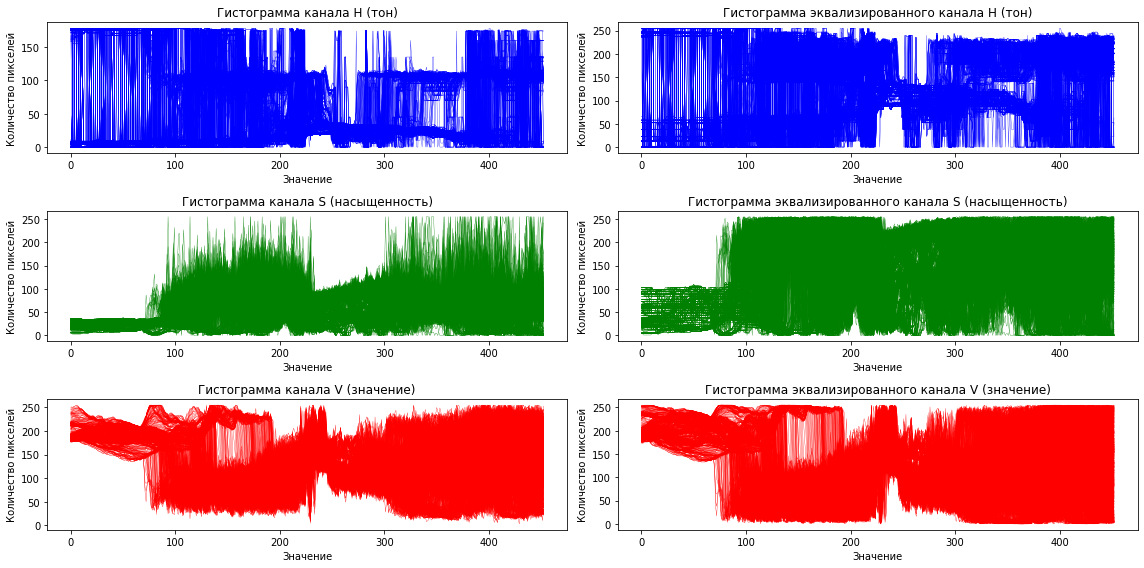

In [28]:
# Отображаем гистограммы
plt.figure(figsize=(16, 8))

plotHist(h, 'blue', 'Гистограмма канала H (тон)', 1)
plotHist(s, 'green', 'Гистограмма канала S (насыщенность)', 3)
plotHist(v, 'red', 'Гистограмма канала V (значение)', 5)
plotHist(h_equalized, 'blue', 'Гистограмма эквализированного канала H (тон)', 2)
plotHist(s_equalized, 'green', 'Гистограмма эквализированного канала S (насыщенность)', 4)
plotHist(v_equalized, 'red', 'Гистограмма эквализированного канала V (значение)', 6)

plt.tight_layout()
plt.show()

## 3) Поканальная эквализация и последующее преобразованием изображение в полутоновое


In [152]:
def hsvToGray(image):
    tmp = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    return cv2.cvtColor(tmp, cv2.COLOR_BGRA2GRAY)

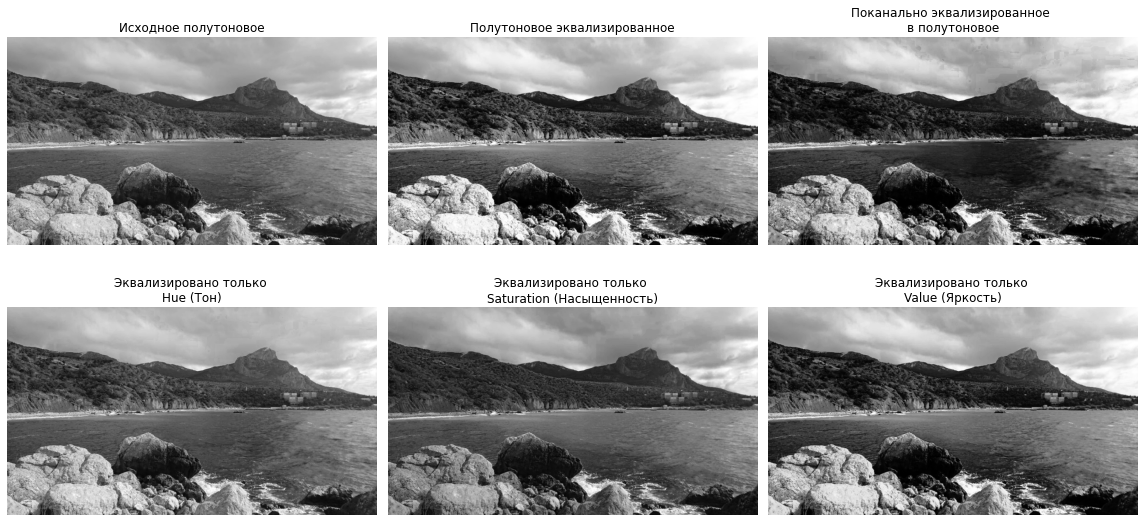

In [156]:
plt.figure(figsize=(16, 8))

plotImage(gray_image, 'Исходное полутоновое', 1, 'gray')
plotImage(equalized_image_gray, 'Полутоновое эквализированное', 2, 'gray')
plotImage(hsvToGray(equalized_image), 'Поканально эквализированное \nв полутоновое', 3, 'gray')
plotImage(hsvToGray(h_equalized_image), 'Эквализировано только \nHue (Тон)', 4, 'gray')
plotImage(hsvToGray(s_equalized_image), 'Эквализировано только \nSaturation (Насыщенность)', 5, 'gray')
plotImage(hsvToGray(v_equalized_image), 'Эквализировано только \nValue (Яркость)', 6, 'gray')

plt.tight_layout()
plt.savefig('1-result_gray.jpg', dpi=300)
plt.show()